## Setup

In [0]:
!git clone https://github.com/Tessellate-Imaging/monk_v1

Cloning into 'monk_v1'...
remote: Enumerating objects: 767, done.
remote: Counting objects: 100% (767/767), done.
remote: Compressing objects: 100% (476/476), done.
remote: Total 767 (delta 344), reused 676 (delta 265), pack-reused 0
Receiving objects: 100% (767/767), 4.74 MiB | 3.61 MiB/s, done.
Resolving deltas: 100% (344/344), done.


In [0]:
#!pip install -r ./monk_v1/installation/requirements_cu10.txt

## Food-NonFood Classification

### Dataset - Food-5K

https://mmspg.epfl.ch/downloads/food-image-datasets/

Food-5K
This is a dataset containing 2500 food and 2500 non-food images, for the task of food/non-food classification in our paper “Food/Non-food Image Classification and Food Categorization using Pre-Trained GoogLeNet Model”. The whole dataset is divided in three parts: training, validation and evaluation. The naming convention is as follows:

{ClassID}_{ImageID}.jpg

ClassID: 0 or 1; 0 means non-food and 1 means food.

### Dataset Preparation

In [0]:
!curl ftp://tremplin.epfl.ch/Food-5K.zip --user FoodImage@grebvm2.epfl.ch:Cahc1moo -o ./Food-5K.zip

In [0]:
mkdir food-5k
!unzip Food-5K.zip -d food-5k

We will combine the training, validation and evaluation images for our training.

In [0]:
from glob import glob

folders = glob("./food-5k/*")
print(folders)

['./food-5k/validation', './food-5k/evaluation', './food-5k/training']


In [0]:
import os

food_dir = './food-5k/food'
non_food_dir = './food-5k/non-food'
if not os.path.exists(food_dir):
    os.makedirs(food_dir)
if not os.path.exists(non_food_dir):
    os.makedirs(non_food_dir)

In [0]:
import shutil
from tqdm import tqdm

c = 1
n_c = 1
for i in folders:
    imageList = glob(i + '/*.jpg')
    print(len(imageList))
    for j in tqdm(imageList):
        imgName = j.split('/')[-1]
        label = imgName.split('_')[0]
        if label == '0':
            outPath = non_food_dir + '/' + str(n_c) + '.jpg'
            n_c += 1
        elif label == '1':
            outPath = food_dir + '/' + str(c) + '.jpg'
            c += 1
        shutil.move(j,outPath)

100%|██████████| 3000/3000 [00:00<00:00, 54144.04it/s]

1000
1000
3000


In [0]:
!rmdir food-5k/training
!rmdir food-5k/validation
!rmdir food-5k/evaluation

### Start Experiment

In [0]:
import os
import sys
sys.path.append("./monk_v1/monk/");
import psutil
from pytorch_prototype import prototype

In [0]:
ptf = prototype(verbose=1);
ptf.Prototype("food_nonfood", "exp1");

Pytorch Version: 1.2.0

Experiment Details
    Project: food_nonfood
    Experiment: exp1
    Dir: /home/abhi/Desktop/food/workspace/food_nonfood/exp1/



In [0]:
ptf.Default(dataset_path="./food-5k/", model_name="resnet18", freeze_base_network=True, num_epochs=5)

Dataset Details
    Train path:     ./food-5k/
    Val path:       None
    CSV train path: None
    CSV val path:  None

Dataset Params
    Input Size:  224
    Batch Size:  4
    Data Shuffle: True
    Processors:   4
    Train-val split:   0.7

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 3500
    Num val images:   1500
    Num classes:      2

Model Params
    Model name:           resnet18
    Use Gpu:              True
    Use pretrained:       True
    Freeze base network:  True

Model Details
    Loading pretrained model
    Model Loaded on device
        Model name:           resnet18
        Num layers in model:  31
        Num trainable layers: 1

Optimizer
    Name:          sgd
    Learning 

In [0]:
ptf.Train()

Training Start
    Epoch 1/5
    ----------




    curr_lr - 0.01
    [Epoch 1] Train-acc: 0.845, Train-loss: 0.427 | Val-acc: 0.976000, Val-loss: 0.072, | time: 19.3 sec

    Epoch 2/5
    ----------




    curr_lr - 0.01
    [Epoch 2] Train-acc: 0.851, Train-loss: 0.439 | Val-acc: 0.965333, Val-loss: 0.096, | time: 18.9 sec

    Epoch 3/5
    ----------


Epoch     2: reducing learning rate of group 0 to 1.0000e-03.


    curr_lr - 0.001
    [Epoch 3] Train-acc: 0.872, Train-loss: 0.397 | Val-acc: 0.948667, Val-loss: 0.153, | time: 18.7 sec

    Epoch 4/5
    ----------




    curr_lr - 0.001
    [Epoch 4] Train-acc: 0.909, Train-loss: 0.259 | Val-acc: 0.982000, Val-loss: 0.057, | time: 18.8 sec

    Epoch 5/5
    ----------




    curr_lr - 0.001
    [Epoch 5] Train-acc: 0.907, Train-loss: 0.247 | Val-acc: 0.983333, Val-loss: 0.053, | time: 18.9 sec

    Training completed in: 1m 33s
    Best val Acc:          0.983333

Training End

Training Outputs
    Model Dir:   /home/abhi/Desktop/food/workspace/food_nonfood/exp1/output/models/
    Log Dir:     /home/abhi/Desktop/food/workspace/food_nonfood/exp1/output/logs/
    Final model: final
    Best model:  best_model
    Log 1 - Validation accuracy history log: val_acc_history.npy
    Log 2 - Validation loss history log:     val_loss_history.npy
    Log 3 - Training accuracy history log:   train_acc_history.npy
    Log 4 - Training loss history log:       train_loss_history.npy
    Log 5 - Training curve:                  train_loss_history.npy
    Log 6 - Validation curve:                train_loss_history.npy



<Figure size 432x288 with 0 Axes>

### Let's try another architecture and see if accuracy improves

In [0]:
ptf = prototype(verbose=1);
ptf.Prototype("food_nonfood", "exp2");

Pytorch Version: 1.2.0

Experiment Details
    Project: food_nonfood
    Experiment: exp2
    Dir: /home/abhi/Desktop/food/workspace/food_nonfood/exp2/



In [0]:
ptf.List_Models()

Models List: 
    1. alexnet
    2. vgg11
    3. vgg11_bn
    4. vgg13
    5. vgg13_bn
    6. vgg16
    7. vgg16_bn
    8. vgg19
    9. vgg19_bn
    10. densenet121
    11. densenet161
    12. densenet169
    13. densenet201
    14. googlenet
    15. inception_v3
    16. resnet18
    17. resnet34
    18. resnet50
    19. resnet101
    20. resnet152
    21. resnext50_32x4d
    22. resnext101_32x8d
    23. shufflenet_v2_x0_5
    24. shufflenet_v2_x1_0, shufflenet_v2_x1_5
    25. shufflenet_v2_x2_0
    26. wide_resnet101_2
    27. wide_resnet50_2
    28. mnasnet0_5
    29. mnasnet0_75
    30. mnasnet1_0
    31. mnasnet1_3
    32. mobilenet_v2
    33. squeezenet1_0
    34. squeezenet1_1



In [0]:
ptf.Default(dataset_path="./food-5k/", model_name="resnet101", freeze_base_network=True, num_epochs=5)

Dataset Details
    Train path:     ./food-5k/
    Val path:       None
    CSV train path: None
    CSV val path:  None

Dataset Params
    Input Size:  224
    Batch Size:  4
    Data Shuffle: True
    Processors:   4
    Train-val split:   0.7

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 3500
    Num val images:   1500
    Num classes:      2

Model Params
    Model name:           resnet101
    Use Gpu:              True
    Use pretrained:       True
    Freeze base network:  True

Model Details
    Loading pretrained model
    Model Loaded on device
        Model name:           resnet101
        Num layers in model:  157
        Num trainable layers: 1

Optimizer
    Name:          sgd
    Learni

In [0]:
ptf.Train()

Training Start
    Epoch 1/5
    ----------




    curr_lr - 0.01
    [Epoch 1] Train-acc: 0.859, Train-loss: 0.395 | Val-acc: 0.915333, Val-loss: 0.757, | time: 35.0 sec

    Epoch 2/5
    ----------




    curr_lr - 0.01
    [Epoch 2] Train-acc: 0.877, Train-loss: 0.396 | Val-acc: 0.950667, Val-loss: 0.183, | time: 39.7 sec

    Epoch 3/5
    ----------




    curr_lr - 0.01
    [Epoch 3] Train-acc: 0.891, Train-loss: 0.361 | Val-acc: 0.917333, Val-loss: 0.649, | time: 36.1 sec

    Epoch 4/5
    ----------


Epoch     3: reducing learning rate of group 0 to 1.0000e-03.


    curr_lr - 0.001
    [Epoch 4] Train-acc: 0.893, Train-loss: 0.354 | Val-acc: 0.933333, Val-loss: 0.533, | time: 35.4 sec

    Epoch 5/5
    ----------




    curr_lr - 0.001
    [Epoch 5] Train-acc: 0.923, Train-loss: 0.214 | Val-acc: 0.972000, Val-loss: 0.076, | time: 36.3 sec

    Training completed in: 2m 59s
    Best val Acc:          0.972000

Training End

Training Outputs
    Model Dir:   /home/abhi/Desktop/food/workspace/food_nonfood/exp2/output/models/
    Log Dir:     /home/abhi/Desktop/food/workspace/food_nonfood/exp2/output/logs/
    Final model: final
    Best model:  best_model
    Log 1 - Validation accuracy history log: val_acc_history.npy
    Log 2 - Validation loss history log:     val_loss_history.npy
    Log 3 - Training accuracy history log:   train_acc_history.npy
    Log 4 - Training loss history log:       train_loss_history.npy
    Log 5 - Training curve:                  train_loss_history.npy
    Log 6 - Validation curve:                train_loss_history.npy



<Figure size 432x288 with 0 Axes>

### Compare

In [0]:
import os
import sys
sys.path.append("./monk_v1/monk/");
import psutil
from compare_prototype import compare

In [0]:
ctf = compare(verbose=1);
ctf.Comparison("food_nonfood");

Comparison: - food_nonfood


In [0]:
ctf.Add_Experiment("food_nonfood", "exp1");
ctf.Add_Experiment("food_nonfood", "exp2");

Project - food_nonfood, Experiment - exp1 added
Project - food_nonfood, Experiment - exp2 added


In [0]:
ctf.Generate_Statistics()

Generating statistics...
Generated



<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

### Inference

In [0]:
ptf = prototype(verbose=1)
ptf.Prototype("food_nonfood", "exp2", eval_infer=True);

Pytorch Version: 1.2.0

Model Details
    Loading model - workspace/food_nonfood/exp2/output/models/final
    Model loaded!

Experiment Details
    Project: food_nonfood
    Experiment: exp2
    Dir: /home/abhi/Desktop/food/workspace/food_nonfood/exp2/



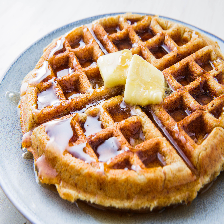

In [0]:
import numpy as np
import PIL.Image as Image
import requests

IMAGE_SHAPE = (224, 224)


test_url = "https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/delish-keto-waffle-horizontal-034-1543784709.jpg"

# URL of the image to be downloaded is defined as image_url 
r = requests.get(test_url) # create HTTP response object 
with open('test.jpg','wb') as f: 
    f.write(r.content) 
test = Image.open('test.jpg').resize(IMAGE_SHAPE)
test

In [0]:
img_name = "./test.jpg";
predictions = ptf.Infer(img_name=img_name, return_raw=False);
print(predictions)

Prediction
    Image name:         ./test.jpg
    Predicted class:      food
    Predicted score:      4.16873025894165

{'img_name': './test.jpg', 'predicted_class': 'food', 'score': 4.1687303}


## Food-11 Classification

### Dataset

This is a dataset containing 16643 food images grouped in 11 major food categories. The 11 categories are Bread, Dairy product, Dessert, Egg, Fried food, Meat, Noodles/Pasta, Rice, Seafood, Soup, and Vegetable/Fruit. Similar as Food-5K dataset, the whole dataset is divided in three parts: training, validation and evaluation. The same naming convention is used, where ID 0-10 refers to the 11 food categories respectively.

In [0]:
classes = {'0':'Bread','1':'Dairy_Product','2':'Dessert','3':'Egg','4':'Fried_Food','5':'Meat','6':'Noodles_Pasta','7':'Rice','8':'Seafood','9':'Soup','10':'Vegetable_Fruit'}

### Dataset Preparation

In [0]:
!curl ftp://tremplin.epfl.ch/Food-11.zip --user FoodImage@grebvm2.epfl.ch:Cahc1moo -o ./Food-11.zip

In [0]:
!mkdir food-11
!unzip Food-11.zip -d food-11

In [0]:
from glob import glob

folders = glob("./food-11/*")
print(folders)

['./food-11/validation', './food-11/evaluation', './food-11/training']


In [0]:
import os

for k,item in classes.items():
    directory = './food-11/' + item
    if not os.path.exists(directory):
        os.makedirs(directory)

In [0]:
import shutil
from tqdm import tqdm

c = 1
for i in folders:
    imageList = glob(i + '/*.jpg')
    #print(len(imageList))
    for j in tqdm(imageList):
        imgName = j.split('/')[-1]
        label = imgName.split('_')[0]
        outPath = './food-11/' + classes[label] + '/' + str(c) + '.jpg'
        c += 1
        shutil.move(j,outPath)




























  0%|          | 0/3430 [00:00<?, ?it/s]


























100%|██████████| 3430/3430 [00:00<00:00, 58981.70it/s]


























  0%|          | 0/3347 [00:00<?, ?it/s]


























100%|██████████| 3347/3347 [00:00<00:00, 52841.85it/s]


























  0%|          | 0/9866 [00:00<?, ?it/s]


























 55%|█████▍    | 5405/9866 [00:00<00:00, 54041.16it/s]


























100%|██████████| 9866/9866 [00:00<00:00, 53577.70it/s]

In [0]:
!find food-11 -type f | wc -l

16643


In [0]:
!rmdir food-11/training
!rmdir food-11/validation
!rmdir food-11/evaluation

### Start Experiment

In [0]:
ptf = prototype(verbose=1);
ptf.Prototype("food-11", "exp1");

Pytorch Version: 1.2.0

Experiment Details
    Project: food-11
    Experiment: exp1
    Dir: /home/abhi/Desktop/food/workspace/food-11/exp1/



In [0]:
ptf.Default(dataset_path="./food-11/", model_name="resnet101", freeze_base_network=True, num_epochs=10)

Dataset Details
    Train path:     ./food-11/
    Val path:       None
    CSV train path: None
    CSV val path:  None

Dataset Params
    Input Size:  224
    Batch Size:  4
    Data Shuffle: True
    Processors:   4
    Train-val split:   0.7

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 11650
    Num val images:   4993
    Num classes:      11

Model Params
    Model name:           resnet101
    Use Gpu:              True
    Use pretrained:       True
    Freeze base network:  True

Model Details
    Loading pretrained model
    Model Loaded on device
        Model name:           resnet101
        Num layers in model:  157
        Num trainable layers: 1

Optimizer
    Name:          sgd
    Lear

In [0]:
ptf.Train()

Training Start
    Epoch 1/10
    ----------




    curr_lr - 0.01
    [Epoch 1] Train-acc: 0.571, Train-loss: 1.290 | Val-acc: 0.698378, Val-loss: 1.442, | time: 117.8 sec

    Epoch 2/10
    ----------




    curr_lr - 0.01
    [Epoch 2] Train-acc: 0.658, Train-loss: 1.065 | Val-acc: 0.669337, Val-loss: 2.099, | time: 116.1 sec

    Epoch 3/10
    ----------




    curr_lr - 0.01
    [Epoch 3] Train-acc: 0.680, Train-loss: 1.004 | Val-acc: 0.756459, Val-loss: 1.315, | time: 117.3 sec

    Epoch 4/10
    ----------




    curr_lr - 0.01
    [Epoch 4] Train-acc: 0.689, Train-loss: 0.971 | Val-acc: 0.705388, Val-loss: 4.682, | time: 116.4 sec

    Epoch 5/10
    ----------




    curr_lr - 0.01
    [Epoch 5] Train-acc: 0.697, Train-loss: 0.962 | Val-acc: 0.765271, Val-loss: 1.730, | time: 117.4 sec

    Epoch 6/10
    ----------




    curr_lr - 0.01
    [Epoch 6] Train-acc: 0.699, Train-loss: 0.945 | Val-acc: 0.764070, Val-loss: 1.424, | time: 116.5 sec

    Epoch 7/10
    ----------


Epoch     6: reducing learning rate of group 0 to 1.0000e-03.


    curr_lr - 0.001
    [Epoch 7] Train-acc: 0.702, Train-loss: 0.923 | Val-acc: 0.755858, Val-loss: 1.737, | time: 118.1 sec

    Epoch 8/10
    ----------




    curr_lr - 0.001
    [Epoch 8] Train-acc: 0.755, Train-loss: 0.756 | Val-acc: 0.771080, Val-loss: 1.941, | time: 118.5 sec

    Epoch 9/10
    ----------




    curr_lr - 0.001
    [Epoch 9] Train-acc: 0.753, Train-loss: 0.748 | Val-acc: 0.793711, Val-loss: 1.181, | time: 119.0 sec

    Epoch 10/10
    ----------




    curr_lr - 0.001
    [Epoch 10] Train-acc: 0.762, Train-loss: 0.730 | Val-acc: 0.735430, Val-loss: 3.100, | time: 116.3 sec

    Training completed in: 19m 29s
    Best val Acc:          0.793711

Training End

Training Outputs
    Model Dir:   /home/abhi/Desktop/food/workspace/food-11/exp1/output/models/
    Log Dir:     /home/abhi/Desktop/food/workspace/food-11/exp1/output/logs/
    Final model: final
    Best model:  best_model
    Log 1 - Validation accuracy history log: val_acc_history.npy
    Log 2 - Validation loss history log:     val_loss_history.npy
    Log 3 - Training accuracy history log:   train_acc_history.npy
    Log 4 - Training loss history log:       train_loss_history.npy
    Log 5 - Training curve:                  train_loss_history.npy
    Log 6 - Validation curve:                train_loss_history.npy



<Figure size 432x288 with 0 Axes>

We can observe that after 10 epochs the model achieves an accuracy of ~ 75%.
The loss was still going down and we can achieve better accuracy if we train for more epochs. Let's try that out using Copy_Experiment

In [0]:
ptf = prototype(verbose=1)
ptf.Prototype("food-11", "exp2", copy_from=["food-11", "exp1"]);

Pytorch Version: 1.2.0

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 11650
    Num val images:   4993
    Num classes:      11

Model Details
    Loading model - workspace/food-11/exp1/output/models/final
    Model Loaded on device
        Model name:           resnet101
        Num layers in model:  157
        Num trainable layers: 1

Experiment Details
    Project: food-11
    Experiment: exp2
    Dir: /home/abhi/Desktop/food/workspace/food-11/exp2/



In [0]:
ptf.update_freeze_layers(100);

Update: Freeze layers - 100



#### Update number of epochs

In [0]:
ptf.update_num_epochs(30);

Update: Num Epochs - 30



#### Finally Run

In [0]:
ptf.Reload()

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 11650
    Num val images:   4993
    Num classes:      11

Model params post freezing
    Num trainable layers: 57



In [0]:
ptf.Train()

Training Start
    Epoch 1/30
    ----------




    curr_lr - 0.01
    [Epoch 1] Train-acc: 0.738, Train-loss: 0.855 | Val-acc: 0.815141, Val-loss: 4.447, | time: 184.0 sec

    Epoch 2/30
    ----------




    curr_lr - 0.01
    [Epoch 2] Train-acc: 0.854, Train-loss: 0.437 | Val-acc: 0.854797, Val-loss: 2.102, | time: 187.0 sec

    Epoch 3/30
    ----------




    curr_lr - 0.01
    [Epoch 3] Train-acc: 0.900, Train-loss: 0.317 | Val-acc: 0.846986, Val-loss: 2.105, | time: 186.6 sec

    Epoch 4/30
    ----------




    curr_lr - 0.01
    [Epoch 4] Train-acc: 0.922, Train-loss: 0.237 | Val-acc: 0.856800, Val-loss: 3.968, | time: 187.2 sec

    Epoch 5/30
    ----------




    curr_lr - 0.01
    [Epoch 5] Train-acc: 0.945, Train-loss: 0.173 | Val-acc: 0.811336, Val-loss: 15.475, | time: 185.4 sec

    Epoch 6/30
    ----------


Epoch     5: reducing learning rate of group 0 to 1.0000e-03.


    curr_lr - 0.001
    [Epoch 6] Train-acc: 0.954, Train-loss: 0.138 | Val-acc: 0.835169, Val-loss: 6.259, | time: 189.1 sec

    Epoch 7/30
    ----------




    curr_lr - 0.001
    [Epoch 7] Train-acc: 0.979, Train-loss: 0.072 | Val-acc: 0.888444, Val-loss: 2.248, | time: 187.4 sec

    Epoch 8/30
    ----------




    curr_lr - 0.001
    [Epoch 8] Train-acc: 0.983, Train-loss: 0.056 | Val-acc: 0.885840, Val-loss: 2.147, | time: 187.6 sec

    Epoch 9/30
    ----------




    curr_lr - 0.001
    [Epoch 9] Train-acc: 0.988, Train-loss: 0.044 | Val-acc: 0.876227, Val-loss: 3.200, | time: 188.1 sec

    Epoch 10/30
    ----------


Epoch     9: reducing learning rate of group 0 to 1.0000e-04.


    curr_lr - 0.0001
    [Epoch 10] Train-acc: 0.987, Train-loss: 0.047 | Val-acc: 0.887643, Val-loss: 2.180, | time: 185.3 sec

    Epoch 11/30
    ----------




    curr_lr - 0.0001
    [Epoch 11] Train-acc: 0.992, Train-loss: 0.033 | Val-acc: 0.866814, Val-loss: 4.183, | time: 184.6 sec

    Epoch 12/30
    ----------




    curr_lr - 0.0001
    [Epoch 12] Train-acc: 0.991, Train-loss: 0.034 | Val-acc: 0.870819, Val-loss: 3.353, | time: 185.1 sec

    Epoch 13/30
    ----------




    curr_lr - 0.0001
    [Epoch 13] Train-acc: 0.992, Train-loss: 0.035 | Val-acc: 0.877829, Val-loss: 3.310, | time: 187.6 sec

    Epoch 14/30
    ----------


Epoch    13: reducing learning rate of group 0 to 1.0000e-05.


    curr_lr - 1e-05
    [Epoch 14] Train-acc: 0.992, Train-loss: 0.032 | Val-acc: 0.869818, Val-loss: 3.779, | time: 187.3 sec

    Epoch 15/30
    ----------




    curr_lr - 1e-05
    [Epoch 15] Train-acc: 0.992, Train-loss: 0.033 | Val-acc: 0.879431, Val-loss: 3.540, | time: 186.9 sec

    Epoch 16/30
    ----------




    curr_lr - 1e-05
    [Epoch 16] Train-acc: 0.992, Train-loss: 0.033 | Val-acc: 0.836171, Val-loss: 8.880, | time: 187.6 sec

    Epoch 17/30
    ----------




    curr_lr - 1e-05
    [Epoch 17] Train-acc: 0.990, Train-loss: 0.034 | Val-acc: 0.889245, Val-loss: 3.118, | time: 190.1 sec

    Epoch 18/30
    ----------


Epoch    17: reducing learning rate of group 0 to 1.0000e-06.


    curr_lr - 1.0000000000000002e-06
    [Epoch 18] Train-acc: 0.991, Train-loss: 0.033 | Val-acc: 0.836571, Val-loss: 9.691, | time: 189.3 sec

    Epoch 19/30
    ----------




    curr_lr - 1.0000000000000002e-06
    [Epoch 19] Train-acc: 0.991, Train-loss: 0.033 | Val-acc: 0.891248, Val-loss: 2.924, | time: 191.9 sec

    Epoch 20/30
    ----------




    curr_lr - 1.0000000000000002e-06
    [Epoch 20] Train-acc: 0.991, Train-loss: 0.032 | Val-acc: 0.860605, Val-loss: 4.191, | time: 188.3 sec

    Epoch 21/30
    ----------




    curr_lr - 1.0000000000000002e-06
    [Epoch 21] Train-acc: 0.992, Train-loss: 0.034 | Val-acc: 0.898258, Val-loss: 2.118, | time: 188.6 sec

    Epoch 22/30
    ----------


Epoch    21: reducing learning rate of group 0 to 1.0000e-07.


    curr_lr - 1.0000000000000002e-07
    [Epoch 22] Train-acc: 0.992, Train-loss: 0.033 | Val-acc: 0.863409, Val-loss: 4.673, | time: 187.7 sec

    Epoch 23/30
    ----------




    curr_lr - 1.0000000000000002e-07
    [Epoch 23] Train-acc: 0.991, Train-loss: 0.035 | Val-acc: 0.849589, Val-loss: 5.192, | time: 187.5 sec

    Epoch 24/30
    ----------




    curr_lr - 1.0000000000000002e-07
    [Epoch 24] Train-acc: 0.993, Train-loss: 0.034 | Val-acc: 0.853595, Val-loss: 6.008, | time: 188.3 sec

    Epoch 25/30
    ----------




    curr_lr - 1.0000000000000002e-07
    [Epoch 25] Train-acc: 0.992, Train-loss: 0.030 | Val-acc: 0.855197, Val-loss: 6.260, | time: 190.9 sec

    Epoch 26/30
    ----------




    curr_lr - 1.0000000000000002e-07
    [Epoch 26] Train-acc: 0.992, Train-loss: 0.034 | Val-acc: 0.894052, Val-loss: 1.604, | time: 188.8 sec

    Epoch 27/30
    ----------




    curr_lr - 1.0000000000000002e-07
    [Epoch 27] Train-acc: 0.992, Train-loss: 0.035 | Val-acc: 0.859003, Val-loss: 5.494, | time: 187.9 sec

    Epoch 28/30
    ----------




    curr_lr - 1.0000000000000002e-07
    [Epoch 28] Train-acc: 0.991, Train-loss: 0.034 | Val-acc: 0.867615, Val-loss: 2.635, | time: 188.0 sec

    Epoch 29/30
    ----------




    curr_lr - 1.0000000000000002e-07
    [Epoch 29] Train-acc: 0.991, Train-loss: 0.035 | Val-acc: 0.871821, Val-loss: 4.245, | time: 187.3 sec

    Epoch 30/30
    ----------


Epoch    29: reducing learning rate of group 0 to 1.0000e-08.


    curr_lr - 1.0000000000000004e-08
    [Epoch 30] Train-acc: 0.992, Train-loss: 0.030 | Val-acc: 0.891448, Val-loss: 2.388, | time: 189.4 sec

    Training completed in: 93m 24s
    Best val Acc:          0.898258

Training End

Training Outputs
    Model Dir:   /home/abhi/Desktop/food/workspace/food-11/exp2/output/models/
    Log Dir:     /home/abhi/Desktop/food/workspace/food-11/exp2/output/logs/
    Final model: final
    Best model:  best_model
    Log 1 - Validation accuracy history log: val_acc_history.npy
    Log 2 - Validation loss history log:     val_loss_history.npy
    Log 3 - Training accuracy history log:   train_acc_history.npy
    Log 4 - Training loss history log:       train_loss_history.npy
    Log 5 - Training curve:                  train_loss_history.npy
    Log 6 - Validation curve:                train_loss_history.npy



<Figure size 432x288 with 0 Axes>

### Compare

In [0]:
import os
import sys
sys.path.append("./monk_v1/monk/");
import psutil
from compare_prototype import compare

In [0]:
ctf = compare(verbose=1);
ctf.Comparison("food-11");

Comparison: - food-11


In [0]:
ctf.Add_Experiment("food-11", "exp1");
ctf.Add_Experiment("food-11", "exp2");

Project - food-11, Experiment - exp1 added
Project - food-11, Experiment - exp2 added


In [0]:
ctf.Generate_Statistics()

Generating statistics...
Generated



<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

### Inference

In [0]:
ptf = prototype(verbose=1)
ptf.Prototype("food-11", "exp2", eval_infer=True);

Pytorch Version: 1.2.0

Model Details
    Loading model - workspace/food-11/exp2/output/models/final
    Model loaded!

Experiment Details
    Project: food-11
    Experiment: exp2
    Dir: /home/abhi/Desktop/food/workspace/food-11/exp2/



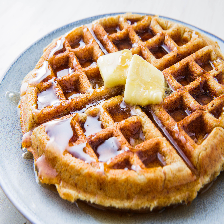

In [0]:
import numpy as np
import PIL.Image as Image
import requests

IMAGE_SHAPE = (224, 224)


test_url = "https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/delish-keto-waffle-horizontal-034-1543784709.jpg"

# URL of the image to be downloaded is defined as image_url 
r = requests.get(test_url) # create HTTP response object 
with open('test.jpg','wb') as f: 
    f.write(r.content) 
test = Image.open('test.jpg').resize(IMAGE_SHAPE)
test

In [0]:
img_name = "./test.jpg";
predictions = ptf.Infer(img_name=img_name, return_raw=False);
print(predictions)

Prediction
    Image name:         ./test.jpg
    Predicted class:      Dessert
    Predicted score:      27.722318649291992

{'img_name': './test.jpg', 'predicted_class': 'Dessert', 'score': 27.722319}


## Food-101 Classification

#### Dataset
A challenging data set of 101 food categories, with 101'000 images. For each class, 250 manually reviewed test images are provided as well as 750 training images. On purpose, the training images were not cleaned, and thus still contain some amount of noise. This comes mostly in the form of intense colors and sometimes wrong labels. All images were rescaled to have a maximum side length of 512 pixels.
https://www.vision.ee.ethz.ch/datasets_extra/food-101/
```
@inproceedings{bossard14,
  title = {Food-101 -- Mining Discriminative Components with Random Forests},
  author = {Bossard, Lukas and Guillaumin, Matthieu and Van Gool, Luc},
  booktitle = {European Conference on Computer Vision},
  year = {2014}
}
```


In [0]:
!wget http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz

In [0]:
!tar -xvf food-101.tar.gz

### Start Experiment

In [0]:
ptf = prototype(verbose=1)
ptf.Prototype("food-101", "exp1")

Pytorch Version: 1.2.0

Experiment Details
    Project: food-101
    Experiment: exp1
    Dir: /home/abhi/Desktop/food/workspace/food-101/exp1/



In [0]:
ptf.Default(dataset_path="./food-101/images/", model_name="densenet169", freeze_base_network=False, num_epochs=10)

Dataset Details
    Train path:     ./food-101/images
    Val path:       None
    CSV train path: None
    CSV val path:  None

Dataset Params
    Input Size:  224
    Batch Size:  4
    Data Shuffle: True
    Processors:   4
    Train-val split:   0.7

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 70700
    Num val images:   30300
    Num classes:      101

Model Params
    Model name:           densenet169
    Use Gpu:              True
    Use pretrained:       True
    Freeze base network:  False

Model Details
    Loading pretrained model
    Model Loaded on device
        Model name:           densenet169
        Num layers in model:  254
        Num trainable layers: 254

Optimizer
    Name:      

### EDA

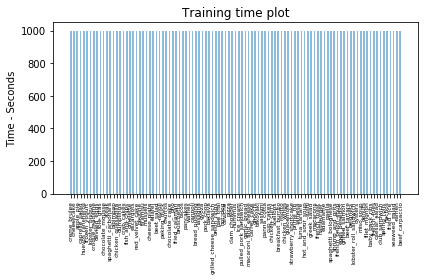

EDA: Class imbalance
    1. Class: creme_brulee, Number: 1000
    2. Class: cheesecake, Number: 1000
    3. Class: apple_pie, Number: 1000
    4. Class: caprese_salad, Number: 1000
    5. Class: huevos_rancheros, Number: 1000
    6. Class: frozen_yogurt, Number: 1000
    7. Class: lobster_bisque, Number: 1000
    8. Class: croque_madame, Number: 1000
    9. Class: deviled_eggs, Number: 1000
    10. Class: foie_gras, Number: 1000
    11. Class: chocolate_mousse, Number: 1000
    12. Class: steak, Number: 1000
    13. Class: spaghetti_carbonara, Number: 1000
    14. Class: bibimbap, Number: 1000
    15. Class: chicken_quesadilla, Number: 1000
    16. Class: dumplings, Number: 1000
    17. Class: crab_cakes, Number: 1000
    18. Class: fish_and_chips, Number: 1000
    19. Class: omelette, Number: 1000
    20. Class: escargots, Number: 1000
    21. Class: red_velvet_cake, Number: 1000
    22. Class: poutine, Number: 1000
    23. Class: tiramisu, Number: 1000
    24. Class: mussels, Number:

<Figure size 432x288 with 0 Axes>

In [0]:
ptf.EDA(show_img=True, save_img=True);

In [0]:
ptf.Estimate_Train_Time(num_epochs=30);

Training time estimate
    30 Epochs: Approx. 1049 Min



In [0]:
ptf.Train()

Training Start
    Epoch 1/10
    ----------




    curr_lr - 0.01
    [Epoch 1] Train-acc: 0.444, Train-loss: 2.252 | Val-acc: 0.614587, Val-loss: 1.786, | time: 2087.1 sec

    Epoch 2/10
    ----------




    curr_lr - 0.01
    [Epoch 2] Train-acc: 0.562, Train-loss: 1.739 | Val-acc: 0.656634, Val-loss: 1.660, | time: 2080.6 sec

    Epoch 3/10
    ----------




    curr_lr - 0.01
    [Epoch 3] Train-acc: 0.617, Train-loss: 1.490 | Val-acc: 0.678152, Val-loss: 1.531, | time: 2074.3 sec

    Epoch 4/10
    ----------




    curr_lr - 0.01
    [Epoch 4] Train-acc: 0.661, Train-loss: 1.315 | Val-acc: 0.699571, Val-loss: 1.430, | time: 2113.2 sec

    Epoch 5/10
    ----------




    curr_lr - 0.001
    [Epoch 5] Train-acc: 0.692, Train-loss: 1.175 | Val-acc: 0.714587, Val-loss: 1.386, | time: 2077.3 sec

    Epoch 6/10
    ----------




    curr_lr - 0.001
    [Epoch 6] Train-acc: 0.812, Train-loss: 0.710 | Val-acc: 0.781716, Val-loss: 1.034, | time: 2102.3 sec

    Epoch 7/10
    ----------




    curr_lr - 0.00010000000000000002
    [Epoch 7] Train-acc: 0.845, Train-loss: 0.586 | Val-acc: 0.790858, Val-loss: 0.975, | time: 2133.4 sec

    Epoch 8/10
    ----------




    curr_lr - 0.00010000000000000002
    [Epoch 8] Train-acc: 0.864, Train-loss: 0.516 | Val-acc: 0.788845, Val-loss: 0.968, | time: 2118.1 sec

    Epoch 9/10
    ----------




    curr_lr - 0.00010000000000000002
    [Epoch 9] Train-acc: 0.868, Train-loss: 0.504 | Val-acc: 0.792376, Val-loss: 0.967, | time: 2172.9 sec

    Epoch 10/10
    ----------




    curr_lr - 0.00010000000000000002
    [Epoch 10] Train-acc: 0.869, Train-loss: 0.498 | Val-acc: 0.794719, Val-loss: 0.953, | time: 2122.3 sec

    Training completed in: 351m 19s
    Best val Acc:          0.794719

Training End

Training Outputs
    Model Dir:   /home/abhi/Desktop/food/workspace/food-101/exp1/output/models/
    Log Dir:     /home/abhi/Desktop/food/workspace/food-101/exp1/output/logs/
    Final model: final
    Best model:  best_model
    Log 1 - Validation accuracy history log: val_acc_history.npy
    Log 2 - Validation loss history log:     val_loss_history.npy
    Log 3 - Training accuracy history log:   train_acc_history.npy
    Log 4 - Training loss history log:       train_loss_history.npy
    Log 5 - Training curve:                  train_loss_history.npy
    Log 6 - Validation curve:                train_loss_history.npy



<Figure size 432x288 with 0 Axes>

### Inference

In [0]:
ptf = prototype(verbose=1)
ptf.Prototype("food-101", "exp1", eval_infer=True);

Pytorch Version: 1.2.0

Model Details
    Loading model - workspace/food-101/exp1/output/models/final
    Model loaded!

Experiment Details
    Project: food-101
    Experiment: exp1
    Dir: /home/abhi/Desktop/food/workspace/food-101/exp1/



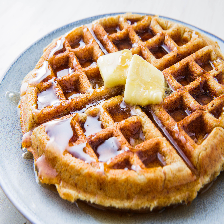

In [0]:
import numpy as np
import PIL.Image as Image
import requests

IMAGE_SHAPE = (224, 224)


test_url = "https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/delish-keto-waffle-horizontal-034-1543784709.jpg"

# URL of the image to be downloaded is defined as image_url 
r = requests.get(test_url) # create HTTP response object 
with open('test.jpg','wb') as f: 
    f.write(r.content) 
test = Image.open('test.jpg').resize(IMAGE_SHAPE)
test

In [0]:
img_name = "./test.jpg";
predictions = ptf.Infer(img_name=img_name, return_raw=False);
print(predictions)

Prediction
    Image name:         ./test.jpg
    Predicted class:      waffles
    Predicted score:      74.87055206298828

{'img_name': './test.jpg', 'predicted_class': 'waffles', 'score': 74.87055}


## Food Classification Application

In [0]:
import requests
import os
import sys
sys.path.append("./monk_v1/monk/");
import psutil
from pytorch_prototype import prototype

def saveImg(img_url):
    # URL of the image to be downloaded is defined as image_url 
    r = requests.get(img_url) # create HTTP response object 
    with open('test.jpg','wb') as f: 
        f.write(r.content)
    

def classify(img_url=None,img_name = './test.jpg'):
    if img_url != None:
        print(img_url)
        saveImg(img_url)
    ptf1 = prototype(verbose=0)
    ptf1.Prototype("food_nonfood", "exp2", eval_infer=True);

    predictions = ptf1.Infer(img_name=img_name, return_raw=False);

    if predictions['predicted_class'] == "non_food":
        print("Input image does not contain food")
    else:
        ptf2 = prototype(verbose=0)
        ptf2.Prototype("food-11", "exp2", eval_infer=True);
        predictions = ptf2.Infer(img_name=img_name, return_raw=False);

        superLabel = predictions['predicted_class']

        ptf3 = prototype(verbose=0)
        ptf3.Prototype("food-101", "exp1", eval_infer=True);
        predictions = ptf3.Infer(img_name=img_name, return_raw=False);

        subLabel = predictions['predicted_class']

        print("Input image is {}, and belongs to category {}.".format(subLabel,superLabel))

In [0]:
IMAGE_SHAPE = (224, 224)

### Update the test_url to test with a new image

#### Pizza

https://www.monsieur-cuisine.com/fileadmin/_processed_/8/4/csm_23148_Rezeptfoto_02_d74eed40d6.jpg
Input image is pizza, and belongs to category Bread.


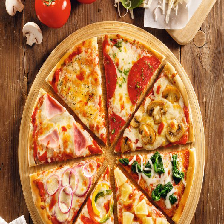

In [0]:
test_url = "https://www.monsieur-cuisine.com/fileadmin/_processed_/8/4/csm_23148_Rezeptfoto_02_d74eed40d6.jpg"

output = classify(test_url)
test = Image.open('test.jpg').resize(IMAGE_SHAPE)
test

#### Waffles

https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/delish-keto-waffle-horizontal-034-1543784709.jpg
Input image is waffles, and belongs to category Dessert.


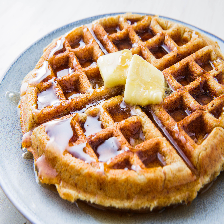

In [0]:
test_url = "https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/delish-keto-waffle-horizontal-034-1543784709.jpg"

output = classify(test_url)
test = Image.open('test.jpg').resize(IMAGE_SHAPE)
test

#### Fried Rice

https://www.fortunefoods.com/sites/default/files/styles/large_image/public/16.png?itok=PbulXPSa
Input image is fried_rice, and belongs to category Rice.


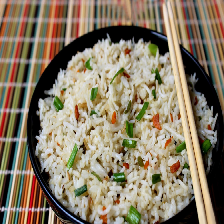

In [0]:
test_url = "https://www.fortunefoods.com/sites/default/files/styles/large_image/public/16.png?itok=PbulXPSa"

output = classify(test_url)
test = Image.open('test.jpg').resize(IMAGE_SHAPE)
test

#### Paella

https://cdn-image.myrecipes.com/sites/default/files/styles/4_3_horizontal_-_1200x900/public/1551740522/0867_180612_DuPree_MyRecipe_Traditional%20Spanish%20Paella_6996%20copy.jpg?itok=cr6GuJWO
Input image is paella, and belongs to category Seafood.


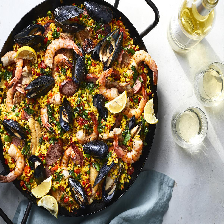

In [0]:
test_url = "https://cdn-image.myrecipes.com/sites/default/files/styles/4_3_horizontal_-_1200x900/public/1551740522/0867_180612_DuPree_MyRecipe_Traditional%20Spanish%20Paella_6996%20copy.jpg?itok=cr6GuJWO"

output = classify(test_url)
test = Image.open('test.jpg').resize(IMAGE_SHAPE)
test

#### Hot and Sour soup

https://culinaryginger.com/wp-content/uploads/Vegetarian-Chinese-Hot-and-Sour-Soup-4-720x405.jpg
Input image is hot_and_sour_soup, and belongs to category Soup.


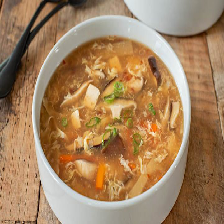

In [0]:
test_url = "https://culinaryginger.com/wp-content/uploads/Vegetarian-Chinese-Hot-and-Sour-Soup-4-720x405.jpg"

output = classify(test_url)
test = Image.open('test.jpg').resize(IMAGE_SHAPE)
test

#### Chicken Wings

https://www.thespruceeats.com/thmb/C7b0KJGGltZW99RX8I1zBTpbNto=/1500x1000/filters:fill(auto,1)/traditional-chicken-wings-912937-10-5b3f8c9ac9e77c00547241ab.jpg
Input image is chicken_wings, and belongs to category Meat.


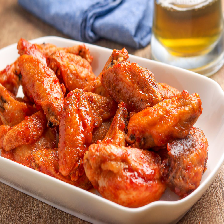

In [0]:
test_url = "https://www.thespruceeats.com/thmb/C7b0KJGGltZW99RX8I1zBTpbNto=/1500x1000/filters:fill(auto,1)/traditional-chicken-wings-912937-10-5b3f8c9ac9e77c00547241ab.jpg"

output = classify(test_url)
test = Image.open('test.jpg').resize(IMAGE_SHAPE)
test

#### Deviled Eggs

https://hips.hearstapps.com/hmg-prod/images/delish-deviled-eggs-horizontal-1542055209.jpg
Input image is deviled_eggs, and belongs to category Egg.


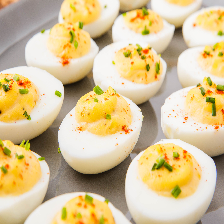

In [0]:
    
test_url = "https://hips.hearstapps.com/hmg-prod/images/delish-deviled-eggs-horizontal-1542055209.jpg"

output = classify(test_url)
test = Image.open('test.jpg').resize(IMAGE_SHAPE)
test

#### Spaghetti Bolognese

https://www.errenskitchen.com/wp-content/uploads/2015/02/Quick-Easy-Spaghetti-Bolognese2-1-500x480.jpg
Input image is spaghetti_bolognese, and belongs to category Noodles_Pasta.


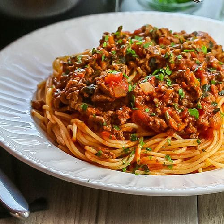

In [0]:
test_url = "https://www.errenskitchen.com/wp-content/uploads/2015/02/Quick-Easy-Spaghetti-Bolognese2-1-500x480.jpg"

output = classify(test_url)
test = Image.open('test.jpg').resize(IMAGE_SHAPE)
test